# 1. Introduction

Airbnb est un marché en ligne pour organiser ou proposer des hébergements, principalement des séjours chez l'habitant, ou des expériences touristiques depuis 2008. PARIS est la ville la plus peuplée de la France et également l'un des lieux touristiques et d'affaires les plus populaires au monde.

Les données Airbnb PARIS 2020-2021 contiennent l'activité d'inscription et les mesures. Dans ce noyau, je voudrais choisir le meilleur modèle de prédiction pour le prix. Pendant ce temps, la relation de la caractéristique de prix examine avec d'autres et une analyse exploratoire des données sera effectuée.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [24]:
paris_listings = pd.read_csv('airbnb_list')
paris_listings.head()

,id,last_scraped,name,description,neighborhood_overview,host_url,neighbourhood,neighbourhood_cleansed,latitude,longitude,...,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,reviews_per_month
0,2577,2020-12-16,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://www.airbnb.com/users/show/2827,NaN,Entrepôt,48.86993,2.36251,...,4,2 baths,2.0,2.0,"[""Dryer"", ""Host greets you"", ""Hot water"", ""Han...",$125.00,3,1125,t,0.04
1,3109,2020-12-17,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://www.airbnb.com/users/show/3631,"Paris, Ile-de-France, France",Observatoire,48.83349,2.31852,...,2,1 bath,NaN,1.0,"[""Children\u2019s books and toys"", ""Paid parki...",$60.00,2,30,t,0.19
2,4890,2020-12-16,Quiet Historic & Cute +Free Cruise,Stylish & Classic One bedroom apartment for up...,"Called ""Paris Next Great Neighborhood"" from Tr...",https://www.airbnb.com/users/show/6792,"Paris, Ile-de-France, France",Temple,48.86409,2.35651,...,4,1 bath,1.0,2.0,"[""Dryer"", ""Host greets you"", ""Hangers"", ""Iron""...",$69.00,5,120,t,0.21
3,5396,2020-12-16,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://www.airbnb.com/users/show/7903,"Paris, Ile-de-France, France",Hôtel-de-Ville,48.85207,2.35871,...,2,1 bath,NaN,1.0,"[""Oven"", ""Fire extinguisher"", ""Host greets you...",$62.00,1,1125,t,1.65
4,7397,2020-12-16,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,https://www.airbnb.com/users/show/2626,NaN,Hôtel-de-Ville,48.85758,2.35275,...,4,1 bath,2.0,2.0,"[""Oven"", ""Paid parking off premises"", ""Hangers...",$53.00,15,130,t,2.28


In [25]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65917 entries, 0 to 65916
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      65917 non-null  int64  
 1   last_scraped            65917 non-null  object 
 2   name                    65853 non-null  object 
 3   description             64474 non-null  object 
 4   neighborhood_overview   39651 non-null  object 
 5   host_url                65917 non-null  object 
 6   neighbourhood           39651 non-null  object 
 7   neighbourhood_cleansed  65917 non-null  object 
 8   latitude                65917 non-null  float64
 9   longitude               65917 non-null  float64
 10  property_type           65917 non-null  object 
 11  room_type               65917 non-null  object 
 12  accommodates            65917 non-null  int64  
 13  bathrooms_text          65791 non-null  object 
 14  bedrooms                52325 non-null

In [27]:
paris_listings['price'] = paris_listings['price'].str.replace('$','')
paris_listings['price'] = paris_listings['price'].str.replace(',', '')
paris_listings['price'] = paris_listings['price'].astype('float')

In [91]:
#paris_listings = paris_listings.drop(['id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'host_url', 'neighbourhood_cleansed', 'neighbourhood', 'latitude', 'longitude', 'property_type', 'room_type', 'beds', 'amenities', 'bathrooms_text', 'minimum_nights', 'maximum_nights', 'has_availability', 'reviews_per_month'], axis= 1) 

In [ ]:
#price_boxplot = dict(markerfacecolor='b', markeredgecolor='b', marker='.')
#paris_listings["price"].plot(kind='box', xlim=(0, 2000), vert=False, flierprops=price_boxplot, figsize=(16,2));

In [ ]:
# supprimer les zéros et les valeurs aberrantes :
#paris_listings.drop(paris_listings[(paris_listings["price"] == 0) | (paris_listings["price"] > 1850)].index, axis=0, inplace=True)

Text(0.5, 1.0, 'Price Distribution Plot')

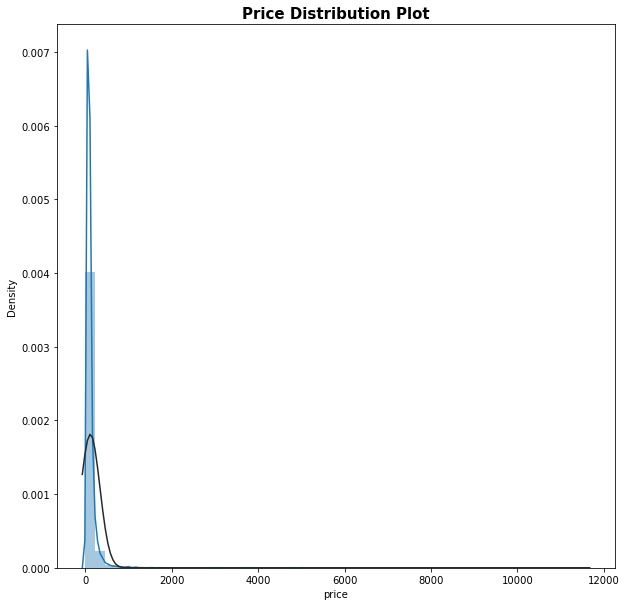

In [28]:
plt.figure(figsize=(10,10))
sns.distplot(paris_listings['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

Le graphique de distribution ci-dessus montre qu'il existe une distribution asymétrique à droite sur le prix. Cela signifie qu'il y a une asymétrie positive. La transformation du journal sera utilisée pour rendre cette fonctionnalité moins biaisée. Cela contribuera à faciliter l'interprétation et à améliorer l'analyse statistique

Puisque la division par zéro est un problème, la transformation log+1 serait préférable.

In [30]:
paris_listings['price_log'] = np.log(paris_listings.price+1)

Avec l'aide de la transformation logarithmique, maintenant, la fonction de prix a une distribution normale.

C:\Users\33644\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

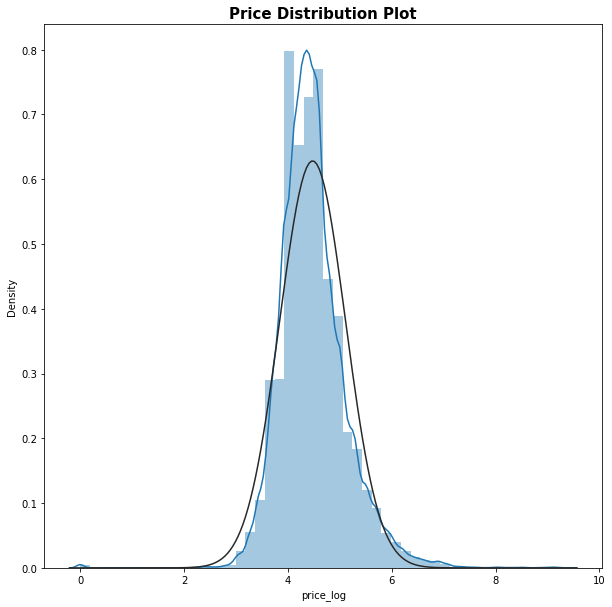

In [31]:
plt.figure(figsize=(10,10))
sns.distplot(paris_listings['price_log'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

Dans le graphique ci-dessous, le bon ajustement indique que la normalité est une approximation raisonnable.

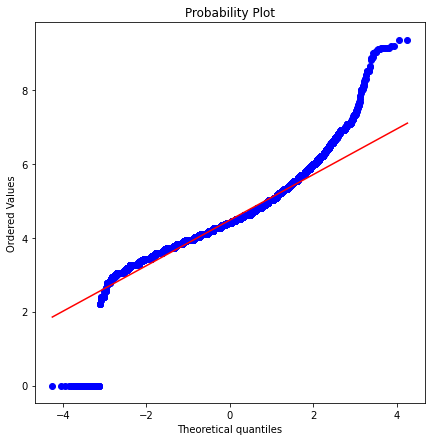

In [32]:
plt.figure(figsize=(7,7))
stats.probplot(paris_listings['price_log'], plot=plt)
plt.show()

Il est maintenant temps de préparer les données pour la modélisation. Premièrement, les données non nominatives et l'ancienne caractéristique de prix seront éliminées.

In [33]:
paris_listings = paris_listings.drop(['id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'host_url', 'price', 'property_type', 'beds', 'amenities', 'bathrooms_text'], axis= 1) 

In [34]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65917 entries, 0 to 65916
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood           39651 non-null  object 
 1   neighbourhood_cleansed  65917 non-null  object 
 2   latitude                65917 non-null  float64
 3   longitude               65917 non-null  float64
 4   room_type               65917 non-null  object 
 5   accommodates            65917 non-null  int64  
 6   bedrooms                52325 non-null  float64
 7   price                   65917 non-null  float64
 8   minimum_nights          65917 non-null  int64  
 9   maximum_nights          65917 non-null  int64  
 10  has_availability        65917 non-null  object 
 11  reviews_per_month       50229 non-null  float64
 12  price_log               65917 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 6.5+ MB


In [35]:
paris_listings.isnull().sum()

neighbourhood             26266
neighbourhood_cleansed        0
latitude                      0
longitude                     0
room_type                     0
accommodates                  0
bedrooms                  13592
price                         0
minimum_nights                0
maximum_nights                0
has_availability              0
reviews_per_month         15688
price_log                     0
dtype: int64

In [38]:
#supprimer les données manquantes dans la base brutes
paris_listings = paris_listings.dropna(subset=['neighbourhood'])
paris_listings = paris_listings.dropna(subset=['bedrooms'])

In [41]:
mean = paris_listings['reviews_per_month'].mean()
paris_listings['reviews_per_month'].fillna(mean, inplace=True)
paris_listings.isnull().sum()

neighbourhood             0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
room_type                 0
accommodates              0
bedrooms                  0
minimum_nights            0
maximum_nights            0
has_availability          0
reviews_per_month         0
price_log                 0
dtype: int64

In [50]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32260 entries, 2 to 65916
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood           32260 non-null  object 
 1   neighbourhood_cleansed  32260 non-null  object 
 2   latitude                32260 non-null  float64
 3   longitude               32260 non-null  float64
 4   room_type               32260 non-null  object 
 5   accommodates            32260 non-null  int64  
 6   bedrooms                32260 non-null  float64
 7   minimum_nights          32260 non-null  int64  
 8   maximum_nights          32260 non-null  int64  
 9   has_availability        32260 non-null  object 
 10  reviews_per_month       32260 non-null  float64
 11  price_log               32260 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 3.2+ MB


In [51]:
paris_listings['neighbourhood']= paris_listings['neighbourhood'].astype("category").cat.codes
paris_listings['neighbourhood_cleansed'] = paris_listings['neighbourhood_cleansed'].astype("category").cat.codes
paris_listings['room_type'] = paris_listings['room_type'].astype("category").cat.codes
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32260 entries, 2 to 65916
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood           32260 non-null  int8   
 1   neighbourhood_cleansed  32260 non-null  int8   
 2   latitude                32260 non-null  float64
 3   longitude               32260 non-null  float64
 4   room_type               32260 non-null  int8   
 5   accommodates            32260 non-null  int64  
 6   bedrooms                32260 non-null  float64
 7   minimum_nights          32260 non-null  int64  
 8   maximum_nights          32260 non-null  int64  
 9   has_availability        32260 non-null  object 
 10  reviews_per_month       32260 non-null  float64
 11  price_log               32260 non-null  float64
dtypes: float64(5), int64(3), int8(3), object(1)
memory usage: 2.6+ MB


In [63]:
paris_listings['has_availability'] = paris_listings['has_availability'].astype("category").cat.codes

Il est maintenant temps de donner plus de détails sur les données. Une table de corrélation sera créée et la méthode Pearson sera utilisée.


In [40]:
#paris_listings = paris_listings.drop(['price'], axis= 1)

Text(0.5, 1.0, 'Correlation Matrix')

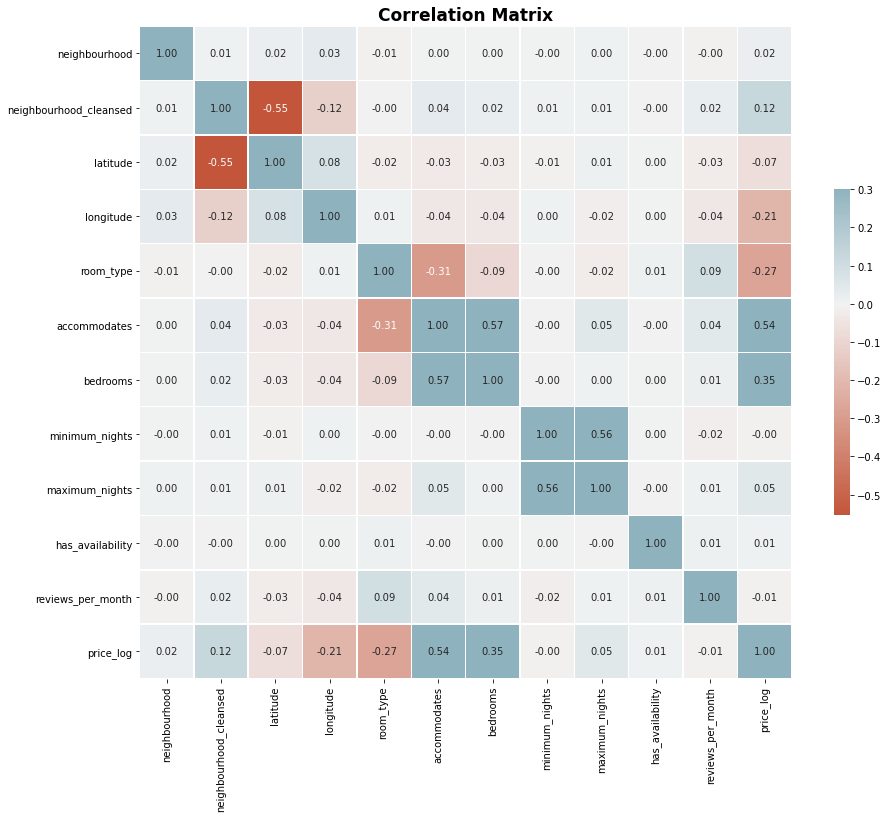

In [64]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=paris_listings.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(12, 0))
plt.title("Correlation Matrix",size=17, weight='bold')

Le tableau de corrélation montre qu'il n'y a pas de relation forte entre le prix et les autres caractéristiques. Cela indique qu'aucune caractéristique n'a besoin d'être retirée des données. Cette relation sera détaillée avec Parcelles résiduelles et Multicolinéarité.

# Parcelles résiduelles

Le tracé résiduel est une méthode puissante pour détecter les valeurs aberrantes, les données non linéaires et détecter les données pour les modèles de régression. Les graphiques ci-dessous montrent les parcelles résiduelles pour chaque fonctionnalité avec le prix.

Une placette résiduelle idéale, la ligne rouge serait horizontale. Sur la base des graphiques ci-dessous, la plupart des fonctionnalités sont non linéaires. D'autre part, il n'y a pas beaucoup de valeurs aberrantes dans chaque caractéristique. Ce résultat a conduit à un sous-ajustement. Un sous-ajustement peut se produire lorsque les entités en entrée n'ont pas de relation forte avec les variables cibles ou sont trop régularisées. Pour éviter le sous-ajustement, de nouvelles fonctionnalités de données peuvent être ajoutées ou le poids de régularisation peut être réduit.

Dans ce noyau, étant donné que les données de caractéristiques d'entrée ne pouvaient pas être augmentées, des modèles linéaires régularisés seront utilisés pour la régularisation et une transformation polynomiale sera effectuée pour éviter le sous-ajustement.

In [65]:
paris_listings_x, paris_listings_y = paris_listings.iloc[:,:-1], paris_listings.iloc[:,-1]

C:\Users\33644\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\33644\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
C:\Users\33644\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\33644\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.

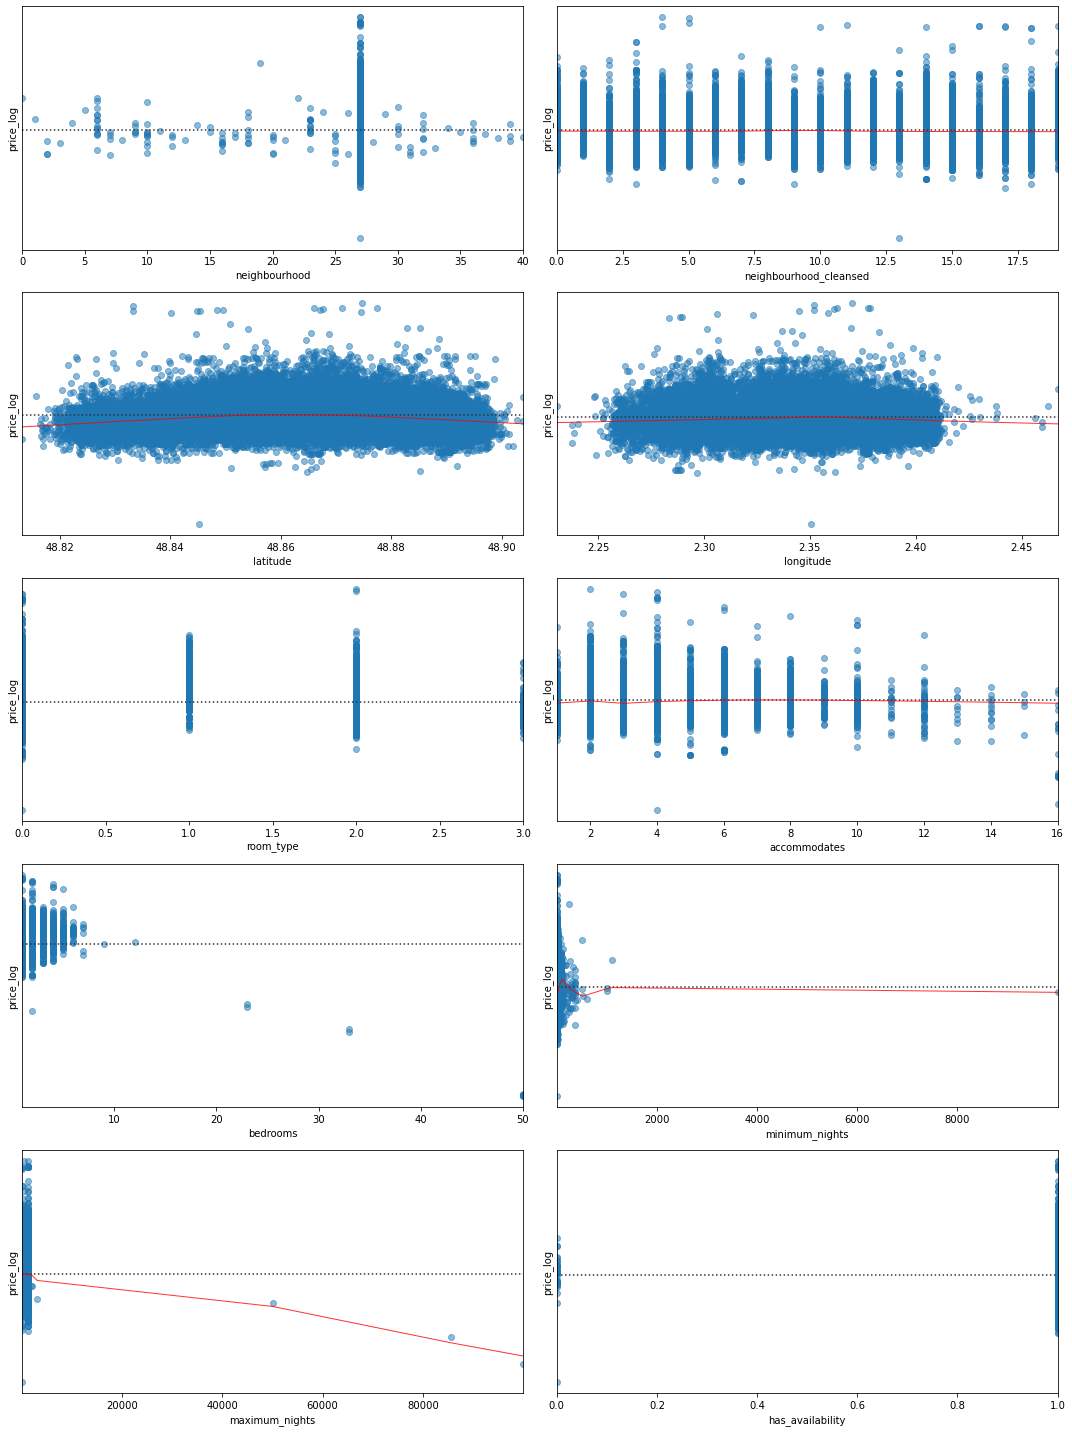

In [66]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))
sns.residplot(paris_listings_x.iloc[:,0],paris_listings_y, lowess=True, ax=axes[0, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(paris_listings_x.iloc[:,1],paris_listings_y, lowess=True, ax=axes[0, 1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(paris_listings_x.iloc[:,2],paris_listings_y, lowess=True, ax=axes[1, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(paris_listings_x.iloc[:,3],paris_listings_y, lowess=True, ax=axes[1, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(paris_listings_x.iloc[:,4],paris_listings_y, lowess=True, ax=axes[2, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(paris_listings_x.iloc[:,5],paris_listings_y, lowess=True, ax=axes[2, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(paris_listings_x.iloc[:,6],paris_listings_y, lowess=True, ax=axes[3, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(paris_listings_x.iloc[:,7],paris_listings_y, lowess=True, ax=axes[3, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(paris_listings_x.iloc[:,8],paris_listings_y, lowess=True, ax=axes[4, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(paris_listings_x.iloc[:,9],paris_listings_y, lowess=True, ax=axes[4, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.setp(axes, yticks=[])
plt.tight_layout()

# Multicolinéarité
La multicolinéarité aidera à mesurer la relation entre les variables explicatives dans la régression multiple. Si une multicolinéarité se produit, ces variables d'entrée fortement liées doivent être éliminées du modèle.

Dans ce noyau, la multicolinéarité sera contrôlée avec les résultats des valeurs de vecteurs propres.

In [67]:
#Eigen vector of a correlation matrix.
multicollinearity, V=np.linalg.eig(corr)
multicollinearity

array([2.16909583, 1.57317434, 1.5560961 , 0.34456973, 0.55598057,
       0.43435971, 0.44363422, 0.86338895, 1.07265698, 0.97304286,
       1.01732161, 0.99667911])

Aucune des valeurs propres de la matrice de corrélation n'est proche de zéro. Cela signifie qu'il n'y a pas de multicolinéarité dans les données.

In [68]:
scaler = StandardScaler()
paris_listings_x = scaler.fit_transform(paris_listings_x)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(paris_listings_x, paris_listings_y, test_size=0.3,random_state=42)

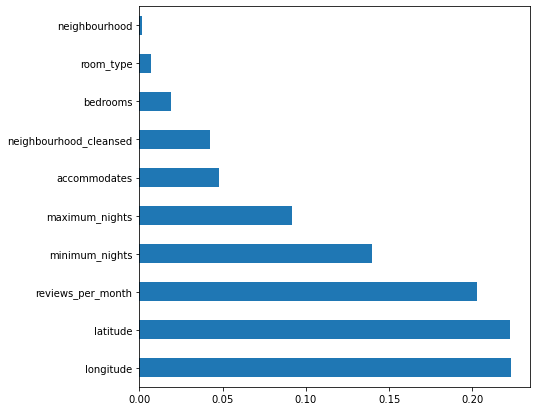

In [70]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=paris_listings.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [73]:
### Linear Regression ###

def linear_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_LR= LinearRegression()

    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_LR = GridSearchCV(estimator=model_LR,  
                         param_grid=parameters,
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_LR.fit(input_x, input_y)
    best_parameters_LR = grid_search_LR.best_params_  
    best_score_LR = grid_search_LR.best_score_ 
    print(best_parameters_LR)
    print(best_score_LR)


linear_reg(paris_listings_x, paris_listings_y)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}
-0.2579327115585001


In [72]:
### Ridge Regression ###

def ridge_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Ridge= Ridge()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(input_x, input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_  
    best_score_Ridge = grid_search_Ridge.best_score_ 
    print(best_parameters_Ridge)
    print(best_score_Ridge)
    
ridge_reg(paris_listings_x, paris_listings_y)

{'alpha': 0.01, 'normalize': True}
-0.2578997347097836


In [74]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)

lasso_reg(paris_listings_x, paris_listings_y)

{'alpha': 0.01, 'normalize': False}
-0.2568632450653054


In [75]:
### ElasticNet Regression ###

def elastic_reg(input_x, input_y,cv=5):
    ## Defining parameters
    model_grid_Elastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_elastic.fit(input_x, input_y)
    best_parameters_elastic = grid_search_elastic.best_params_  
    best_score_elastic = grid_search_elastic.best_score_ 
    print(best_parameters_elastic)
    print(best_score_elastic)

elastic_reg(paris_listings_x, paris_listings_y)

{'alpha': 0.01, 'normalize': False}
-0.2576386181524303


In [78]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

In [79]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

#Ridge Model
ridge_model = Ridge(alpha = 0.01, normalize = True)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

#Lasso Model
Lasso_model = Lasso(alpha = 0.001, normalize =False)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test) 

#ElasticNet Model
model_enet = ElasticNet(alpha = 0.01, normalize=False)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)


In [80]:
paris_listings_xx= paris_listings.drop(columns=['neighbourhood_cleansed', 'room_type'])

In [81]:
paris_listings_xx, paris_listings_yx = paris_listings_xx.iloc[:,:-1], paris_listings_xx.iloc[:,-1]
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(paris_listings_xx, paris_listings_yx, test_size=0.3,random_state=42)

In [82]:
scaler = StandardScaler()
paris_listings_xx = scaler.fit_transform(paris_listings_xx)

In [83]:
### Linear Regression ###
linear_reg(paris_listings_xx, paris_listings_yx, cv=4)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}
-0.2690545214331163


In [84]:
### Ridge Regression ###
ridge_reg(paris_listings_xx, paris_listings_yx, cv=4)

{'alpha': 0.01, 'normalize': True}
-0.2690018780007582


In [85]:
### Lasso Regression ###
lasso_reg(paris_listings_xx, paris_listings_yx, cv=4)

{'alpha': 0.01, 'normalize': False}
-0.26792316020368084


In [86]:
### ElasticNet Regression ###
elastic_reg(paris_listings_xx, paris_listings_yx, cv=4)

{'alpha': 0.01, 'normalize': False}
-0.26869148134092574


In [87]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_x = Poly.fit_transform(X_train_x)
X_test_x = Poly.fit_transform(X_test_x)

# Model Prediction

In [88]:
###Linear Regression
lr_x = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr_x.fit(X_train_x, y_train_x)
lr_pred_x= lr_x.predict(X_test_x)

###Ridge
ridge_x = Ridge(alpha = 0.01, normalize = True)
ridge_x.fit(X_train_x, y_train_x)           
pred_ridge_x = ridge_x.predict(X_test_x) 

###Lasso
Lasso_x = Lasso(alpha = 0.001, normalize =False)
Lasso_x.fit(X_train_x, y_train_x)
pred_Lasso_x = Lasso_x.predict(X_test_x) 

##ElasticNet
model_enet_x = ElasticNet(alpha = 0.01, normalize=False)
model_enet_x.fit(X_train_x, y_train_x) 
pred_train_enet_x= model_enet_x.predict(X_train_x)
pred_test_enet_x= model_enet_x.predict(X_test_x)

C:\Users\33644\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2721.1669661765764, tolerance: 0.8648414315757775
  model = cd_fast.enet_coordinate_descent(
C:\Users\33644\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2732.433535001235, tolerance: 0.8648414315757775
  model = cd_fast.enet_coordinate_descent(


In [89]:
print('-------------Lineer Regression-----------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, lr_pred_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, lr_pred_x)))   
print('R2 %f' % r2_score(y_test_x, lr_pred_x))

print('---------------Ridge ---------------------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, pred_ridge_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, pred_ridge_x)))   
print('R2 %f' % r2_score(y_test_x, pred_ridge_x))

print('---------------Lasso-----------------------')

print('--Phase-1--')
print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

print('--Phase-2--')
print('MAE: %f' % mean_absolute_error(y_test_x, pred_Lasso_x))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x, pred_Lasso_x)))
print('R2 %f' % r2_score(y_test_x, pred_Lasso_x))

print('---------------ElasticNet-------------------')

print('--Phase-1 --')
print('MAE: %f' % mean_absolute_error(y_test,pred_test_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_enet))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_enet))

print('--Phase-2--')
print('MAE: %f' % mean_absolute_error(y_test_x,pred_test_enet_x)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x,pred_test_enet_x))) #RMSE
print('R2 %f' % r2_score(y_test_x, pred_test_enet_x))

-------------Lineer Regression-----------
--Phase-1--
MAE: 0.341661
RMSE: 0.472683
R2 0.410278
--Phase-2--
MAE: 0.361936
RMSE: 0.497628
R2 0.346392
---------------Ridge ---------------------
--Phase-1--
MAE: 0.341600
RMSE: 0.471327
R2 0.413657
--Phase-2--
MAE: 0.363546
RMSE: 0.496746
R2 0.348708
---------------Lasso-----------------------
--Phase-1--
MAE: 0.340831
RMSE: 0.468478
R2 0.420723
--Phase-2--
MAE: 0.364252
RMSE: 0.498319
R2 0.344576
---------------ElasticNet-------------------
--Phase-1 --
MAE: 0.340806
RMSE: 0.466966
R2 0.424457
--Phase-2--
MAE: 0.364101
RMSE: 0.497822
R2 0.345882


Les résultats montrent que tous les modèles ont des résultats de prédiction similaires. Les phases 1 et 2 présentent une grande différence pour chaque métrique. Toutes les valeurs métriques sont augmentées dans la phase 2, cela signifie que la valeur d'erreur de prédiction est plus élevée dans cette phase et que l'explicabilité du modèle est très faible la variabilité des données de réponse autour de la moyenne.

La valeur MAE de 0 indique aucune erreur sur le modèle. En d'autres termes, il existe une prédiction parfaite. Les résultats ci-dessus montrent que toutes les prédictions ont une grande erreur, en particulier dans la phase 2.
RMSE donne une idée de la quantité d'erreurs que le système fait généralement dans ses prédictions. Les résultats ci-dessus montrent que tous les modèles avec chaque phase ont des erreurs significatives.
R2 représente la proportion de la variance d'une variable dépendante expliquée par une variable indépendante. Les résultats ci-dessus montrent qu'en phase 1, 52 % des données correspondent au modèle de régression tandis qu'en phase 2, 20 % des données correspondent au modèle de régression.

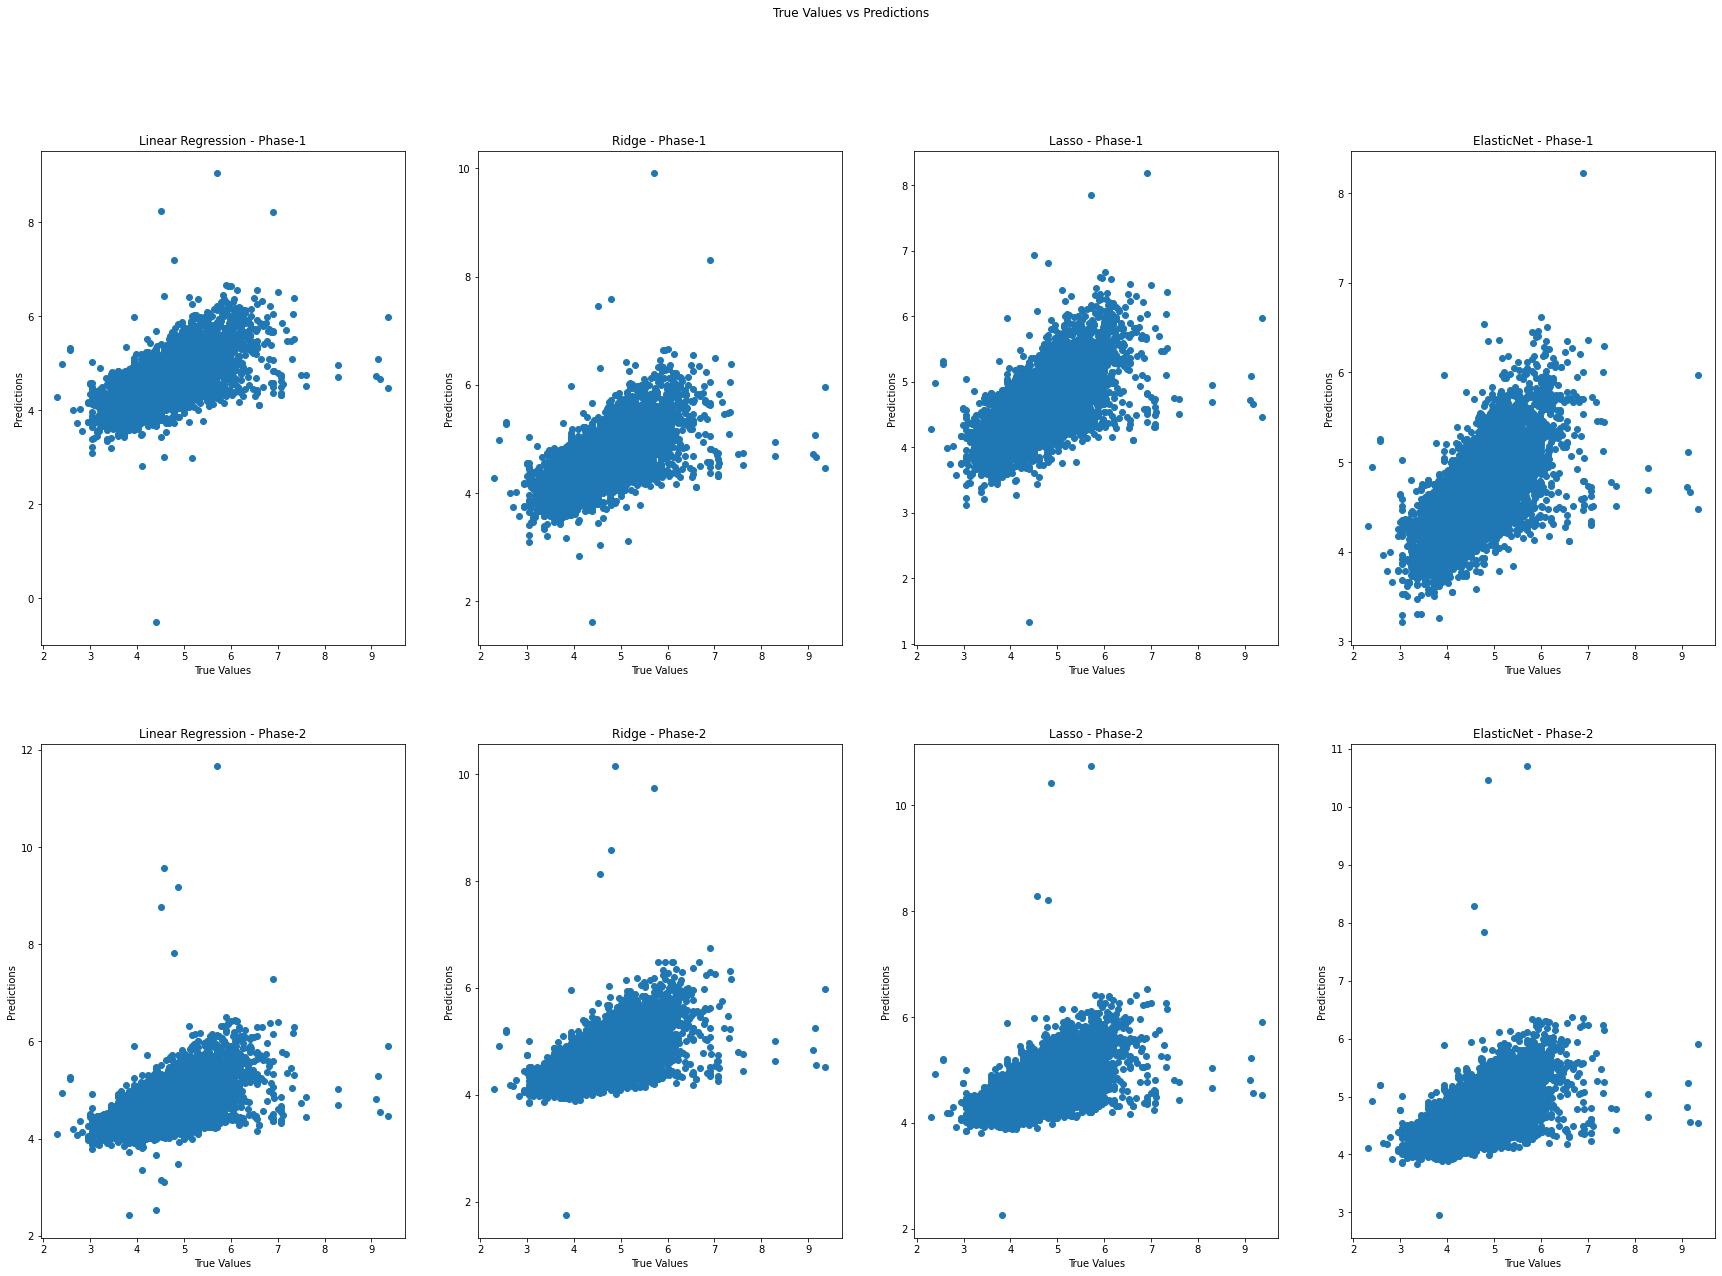

In [90]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(30, 20))
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, lr_pred)
ax1.set_title('Linear Regression - Phase-1')

ax2.scatter(y_test, pred_ridge)
ax2.set_title('Ridge - Phase-1')

ax3.scatter(y_test, pred_Lasso)
ax3.set_title('Lasso - Phase-1')

ax4.scatter(y_test, pred_test_enet)
ax4.set_title('ElasticNet - Phase-1')

ax5.scatter(y_test_x, lr_pred_x)
ax5.set_title('Linear Regression - Phase-2')

ax6.scatter(y_test_x, pred_ridge_x)
ax6.set_title('Ridge - Phase-2')

ax7.scatter(y_test_x, pred_Lasso_x)
ax7.set_title('Lasso - Phase-2')

ax8.scatter(y_test_x, pred_test_enet_x)
ax8.set_title('ElasticNet - Phase-2')

for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')


Le dernier graphique concerne la différence entre les valeurs réelles et la prédiction pour la phase 1 et la phase 2. La grande différence entre les deux phases a été observée dans les modèles de «régression linéaire» et de «régression ElasticNet».


# 5. Conclusion

Dans ce noyau, j'essaie de faire des prédictions avec différents modèles de régression et de comparer les résultats des métriques d'importance. J'espère que cela aidera d'autres personnes.